## Part II : Using the perceptron

Import the libraries

In [82]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import time


# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold



# Import our perceptron implementation
from perceptron import Perceptron 


Loading the dataset and plotting the first images

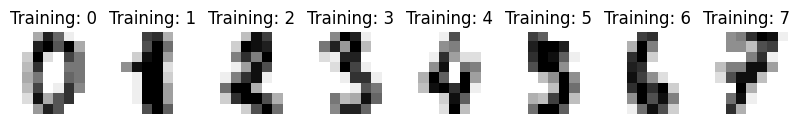

In [83]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


Discarding the images that are not 0 or 1

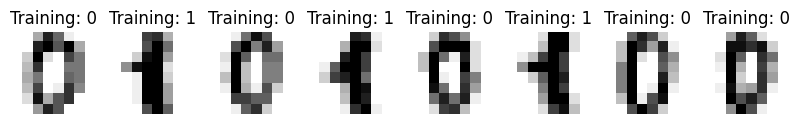

In [84]:
# Filter the dataset to keep only the digits 0 and 1, coded using ChatGPT
mask = (digits.target == 0) | (digits.target == 1)
filtered_images = digits.images[mask]
filtered_labels = digits.target[mask]

# plotting the first 8 images to verify
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
for ax, image, label in zip(axes, filtered_images, filtered_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


## Classification  

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

We can then split the data into train and test subsets.

In [85]:
# flatten the images
n_samples = len(filtered_images)
data = filtered_images.reshape((n_samples, -1))


# Split data into 80% train and 20% test subsets
X_train_, X_test, y_train_, y_test = train_test_split(
    data, filtered_labels, test_size=0.2, random_state=0
)

# The conversion of label 0 to -1 for the activation function
for i in range(len(y_train_)):
    if y_train_[i]==0:
        y_train_[i]=-1

for i in range(len(y_test)):
    if y_test[i]==0:
        y_test[i]=-1



Performing a 5-fold cross validation to evaluate our model on the validation set

In [86]:
# Number of folds
n_splits = 5

# Create KFold object
kf = KFold(n_splits=n_splits)

# Initialize list to store scores
scores = []

# Iterate over each split, coded with chatGPT
for train_index, test_index in kf.split(X_train_):
    # Split data
    X_train, X_test = X_train_[train_index], X_train_[test_index]
    y_train, y_test = y_train_[train_index], y_train_[test_index]

    # Initialize your Perceptron model
    clf = Perceptron()

    # Train the model
    clf.train(X_train, y_train)

    # Evaluate the model
    y_pred = clf.predict(X_test)
    score = np.mean(y_pred == y_test)
    scores.append(score)

# Calculate average performance
average_score = np.mean(scores)
print(f"scores :{scores}")
print(f"Average Score: {average_score}")

scores :[1.0, 1.0, 1.0, 1.0, 1.0]
Average Score: 1.0


We can now fit our perceptron classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset, we also mesure how fast it is on the testing set.

In [87]:
# Create a classifier
clf = Perceptron()

start_training = time.time()
# Learn the digits on the train subset
clf.train(X_train_,y_train_)
end_training = time.time()
# Start timer
start_time = time.time()

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
# End timer
end_time = time.time()
# Calculate and print the elapsed time
elapsed_time_predict = end_time - start_time
elapsed_time_training = end_training-start_training

my_training_time = elapsed_time_predict+elapsed_time_training

print(f"Predicting time: {elapsed_time_predict} seconds")
print(f"Training time: {elapsed_time_training} seconds")
print(f"Testing time: {elapsed_time_predict + elapsed_time_training} seconds")

Predicting time: 0.0 seconds
Training time: 0.0019979476928710938 seconds
Testing time: 0.0019979476928710938 seconds


Below we visualize the first 6 test samples and show their predicted digit value in the title.



The accuracy of our classifier is 100.0


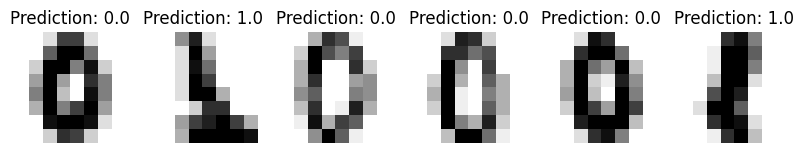

In [88]:
# flip the labels "-1" back to 0
for i in range(len(predicted)):
    if predicted[i]==-1:
        predicted[i]=0

for i in range(len(y_test)):
    if y_test[i]==-1:
        y_test[i]=0


# plot the first 6 labels to verify our classification     
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")



# plot the accuracy of our Perceptron
accuracy = metrics.accuracy_score(predicted, y_test)
print("The accuracy of our classifier is {}".format(100*accuracy))

Classification_report builds a text report showing the main classification metrics.




In [89]:
print(
    f"Classification report for Perceptron:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)


Classification report for Perceptron:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        31

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57




# Comparison with Scikit-learn

We load and intialize scikit-learn's Perceptron, and plot its performance

In [90]:
from sklearn.linear_model import Perceptron as Perceptron_sk

# Create a classifier
clf = Perceptron_sk()

start_training = time.time()
# Learn the digits on the train subset
clf.fit(X_train_,y_train_)
end_training = time.time()
# Start timer
start_time = time.time()

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
# End timer
end_time = time.time()
# Calculate and print the elapsed time
elapsed_time_predict = end_time - start_time
elapsed_time_training = end_training-start_training

sk_training_time = elapsed_time_predict + elapsed_time_training

print(f"Predicting time: {elapsed_time_predict} seconds")
print(f"Training time: {elapsed_time_training} seconds")
print(f"Testing - sklearn time: {elapsed_time_predict + elapsed_time_training} seconds")



# flip the labels "-1" back to 0
for i in range(len(predicted)):
    if predicted[i]==-1:
        predicted[i]=0

for i in range(len(y_test)):
    if y_test[i]==-1:
        y_test[i]=0


sk_accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy of sk learn's model ;",sk_accuracy*100)


Predicting time: 0.0 seconds
Training time: 0.002000570297241211 seconds
Testing - sklearn time: 0.002000570297241211 seconds
Accuracy of sk learn's model ; 100.0


Time Comparison between our model and scikit learn's

In [91]:
# Calculate and print the time difference
if my_training_time < sk_training_time:
    faster_by = sk_training_time / my_training_time
    print(f"Our custom Perceptron is {faster_by:.2f} times faster than scikit-learn's Perceptron.")
else:
    faster_by = my_training_time / sk_training_time
    print(f"Scikit-learn's Perceptron is {faster_by:.2f} times faster than my custom Perceptron.")

Our custom Perceptron is 1.00 times faster than scikit-learn's Perceptron.
